<a href="https://colab.research.google.com/github/Raulfb04/EDP-1/blob/main/Ecuacion%20de%20onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


<IPython.core.display.Math object>

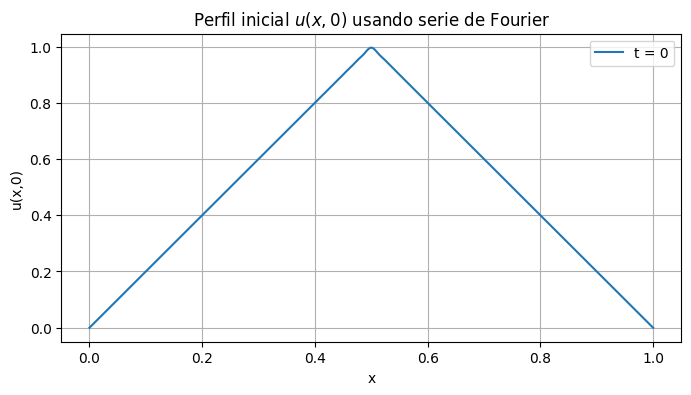

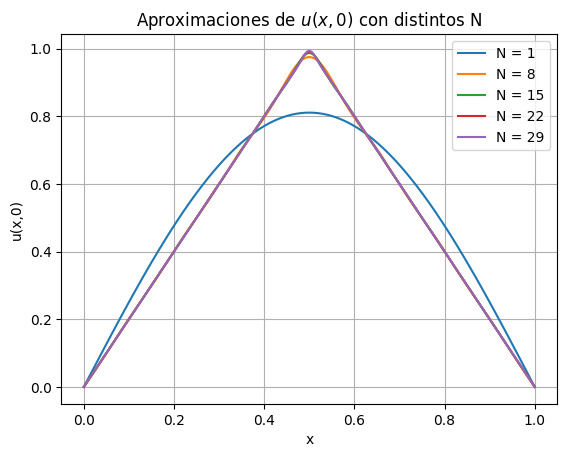

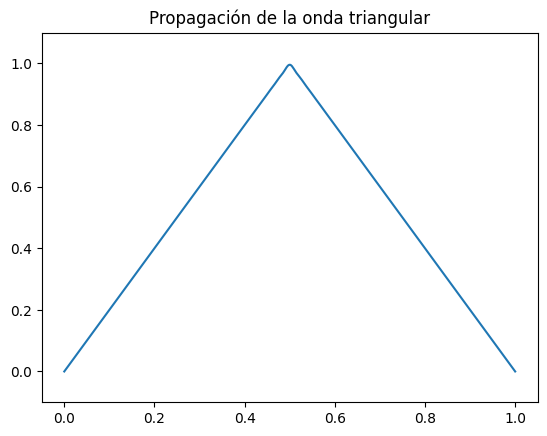

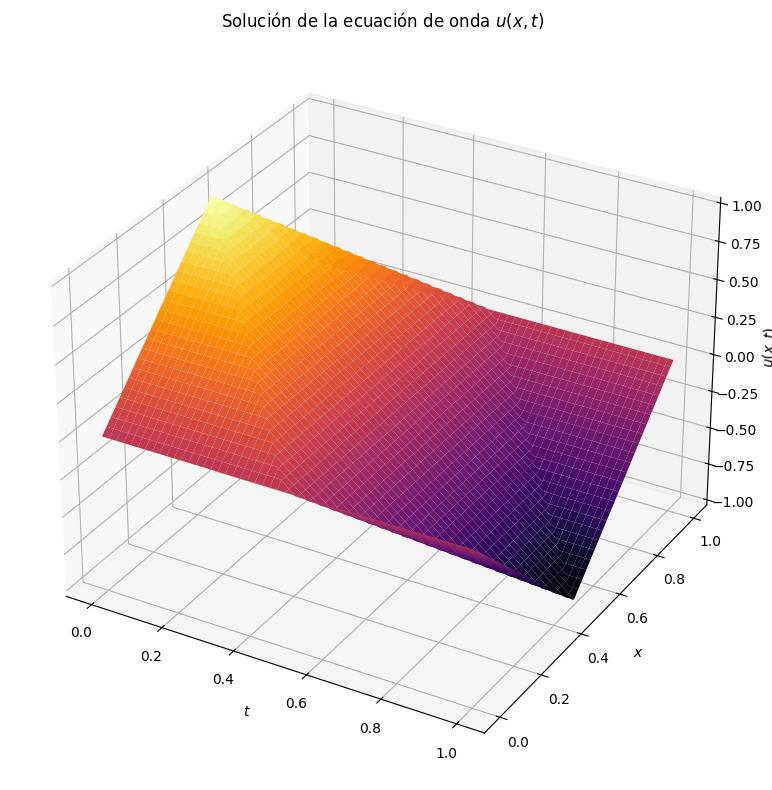

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Math

# Mostrar la función analítica con LaTeX
display(Math(r"""
u(x,t) = \sum_{n=1,3,5,\dots}^{\infty} \frac{8k}{(n\pi)^2} \sin\left( \frac{n\pi}{2} \right)
\sin\left( \frac{n\pi x}{L} \right) \cos\left( \frac{n\pi c t}{L} \right)
"""))

# Parámetros
L = 1
c = 1
k = 1
N = 50
x = np.linspace(0, L, 500)

# Solución u(x,t)
def u_xt(x, t, N):
    sum_series = np.zeros_like(x)
    for n in range(1, 2*N, 2):  # Solo términos impares
        coef = (8 * k) / (n * np.pi)**2
        term = coef * np.sin(n * np.pi / 2) * np.sin(n * np.pi * x / L) * np.cos(n * np.pi * c * t / L)
        sum_series += term
    return sum_series

# Gráfica de la condición inicial (t=0)
plt.figure(figsize=(8,4))
plt.plot(x, u_xt(x, 0, N), label='t = 0')
plt.title('Perfil inicial $u(x,0)$ usando serie de Fourier')
plt.xlabel('x')
plt.ylabel('u(x,0)')
plt.grid(True)
plt.legend()
plt.show()

# Aproximaciones para distintos valores de N
plt.figure()
for i in range(1, 30, 7):
    plt.plot(x, u_xt(x, 0, i), label=f'N = {i}')
plt.title('Aproximaciones de $u(x,0)$ con distintos N')
plt.xlabel('x')
plt.ylabel('u(x,0)')
plt.grid(True)
plt.legend()
plt.show()

# Animación de la propagación de la onda
fig, ax = plt.subplots()
line, = ax.plot(x, u_xt(x, 0, N))
ax.set_ylim(-0.1, 1.1)
ax.set_title("Propagación de la onda triangular")

def update(t):
    line.set_ydata(u_xt(x, t, N))
    ax.set_title(f"t = {t:.2f} s")
    return line,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2, 100), interval=50)
plt.show()

# Gráfica 3D u(x,t)
x3d = np.linspace(0, L, 200)
t3d = np.linspace(0, 1.0, 200)
X, T = np.meshgrid(x3d, t3d)

def u_xt_mesh(X, T, N=50):
    U = np.zeros_like(X)
    for n in range(1, 2*N, 2):
        coef = (8 * k) / (n * np.pi)**2
        term = coef * np.sin(n * np.pi / 2) * np.sin(n * np.pi * X / L) * np.cos(n * np.pi * c * T / L)
        U += term
    return U

U = u_xt_mesh(X, T, N)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, X, U, cmap="inferno")
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_zlabel('$u(x,t)$')
ax.set_title('Solución de la ecuación de onda $u(x,t)$')
plt.tight_layout()
plt.show()